In [4]:
import sys
sys.path.append('/home/svdcvt/miniconda3/lib/python3.8/site-packages')
import numpy as np
import tinkhorn
import matplotlib.pyplot as plt

$C$ is a distance matrix of size (n, n), which is **symmetrical Toeplitz** in case of bins.

$a, b$ are computed with Sinkhorn scaling vectors of size (1, n).

$[a^T * \exp(-C\ /\ \varepsilon) * b]\ @\ C$ is a matrix, where column argmin is finded to map X-bins to Y-bins.

If $C$ is Euclid distances, mapping is just $(\gamma @ Y)\ /\ \gamma.sum(-1)$

In [5]:
# binsize, beta, shape = 32, 0.2, 'circle'
# binsize, beta, shape = 128, 0.2, 'tor'
binsize, shape = 128, 'flower'

bins = np.load(f'bins_{shape}_{binsize}.npy', allow_pickle=True)
p, q = np.load(f'p_{shape}_{binsize}.npy', allow_pickle=True), np.load(f'q_{shape}_{binsize}.npy', allow_pickle=True)

In [6]:
# C = np.load('C_bins_128.npy', allow_pickle=True)
method = 'sinkhorn'
K = np.load(f'K_{method}.npy', allow_pickle=True)
a = np.load(f'a_{method}.npy', allow_pickle=True)[:, None]
b = np.load(f'b_{method}.npy', allow_pickle=True)[:, None]

In [7]:
method = 'sinkhorn_toeplitz'
K_ = np.load(f'K_{method}.npy', allow_pickle=True).item(0)
a_ = np.load(f'a_{method}.npy', allow_pickle=True)[:, None]
b_ = np.load(f'b_{method}.npy', allow_pickle=True)[:, None]

In [8]:
bt = (b_ * bins).T
# source_image = (np.vstack([K_.matvec(bt.T[:,i], 0) for i in range(bins.shape[1])]) * a_.T).T * (binsize**bins.shape[1])
source_image = (np.vstack([K_.matvec(bt.T[:,i], 0) for i in range(bins.shape[1])]) * a_.T).T / (p.ravel()+1e-20)[:,None]

In [26]:
at = (a_ * bins)
# source_image = (np.vstack([K_.matvec(bt.T[:,i], 0) for i in range(bins.shape[1])]) * a_.T).T * (binsize**bins.shape[1])
source_image_ = (np.vstack([K_.matvec(at[:,i], 0) for i in range(bins.shape[1])]) * b_.T).T / (q.ravel()+1e-20)[:,None]

In [28]:
# np.save(f'source_image_{shape}_{binsize}.npy', source_image)

In [30]:
%timeit bt_ = (b_ * bins); src_ = (np.vstack([K_.matvec(bt_[:,0], 0), K_.matvec(bt_[:,1], 0)]) * a_.T).T

5.02 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
K.shape, a.shape, b.shape, bins.shape, p.shape, q.shape

((16384, 6896), (16384, 1), (6896, 1), (16384, 2), (128, 128), (128, 128))

In [48]:
%timeit srcc = ((K @ (b * bins[q.ravel()>0])).T * a.T).T

163 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
((K.T @ (a * bins[p.ravel()>0])).T * b.T).T / (q.ravel() + 1e-20)[q.ravel()>0,None]

array([[-5.14799114, -9.05610802],
       [-4.87409959, -9.06473398],
       [-4.5847834 , -9.07383581],
       ...,
       [-3.96631713,  9.0929601 ],
       [-3.64231171,  9.10263979],
       [-3.31294902,  9.1121286 ]])

In [43]:
np.isclose(src_, src__).all(), np.isclose(src, srcc).all(), np.isclose(src__, srcc).all()

(True, True, True)

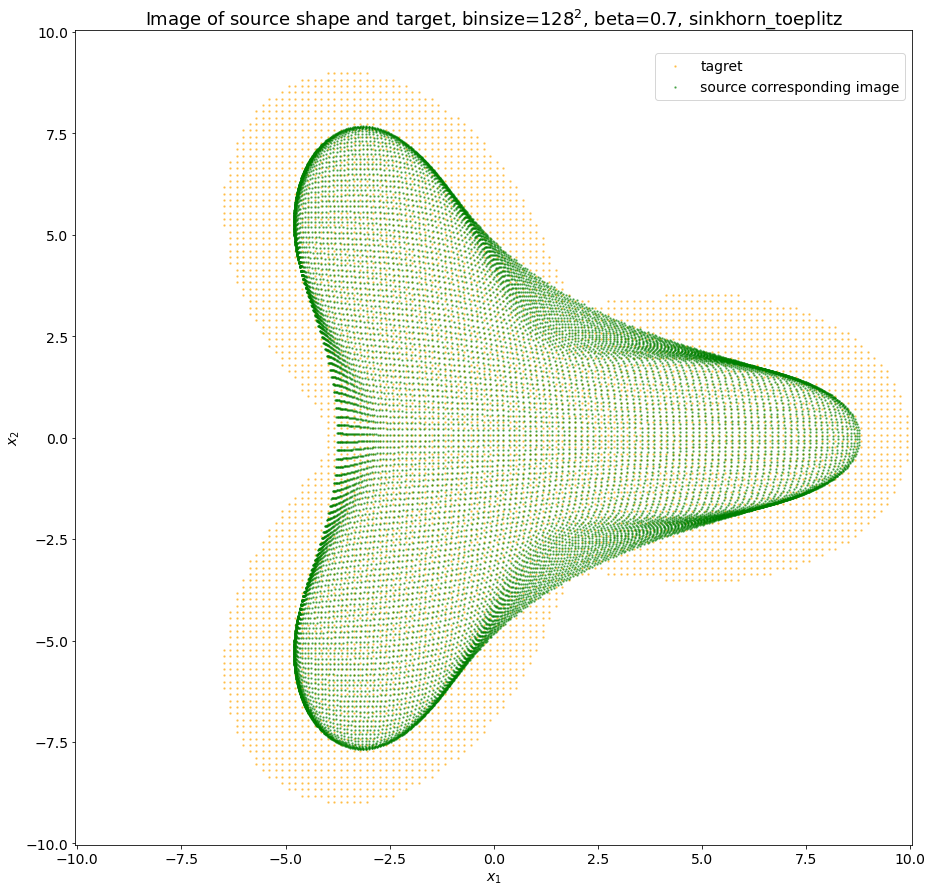

In [17]:
plot_image(bins[q.ravel() > 0], source_image, 'images/image/', 
           limits=((-10,-10),(10,10)),binsize=128, beta='0.7', method=method, shape='flower')

In [27]:
0.1*1000

100.0

In [36]:
!python3 mapping.py 128 flower toeplitz

usage: mapping.py [-h] [--inverse] [--path PATH]
                  binsize {sphere,circle,flower} {sinkhorn,sinkhorn_toeplitz}
mapping.py: error: argument method: invalid choice: 'toeplitz' (choose from 'sinkhorn', 'sinkhorn_toeplitz')
